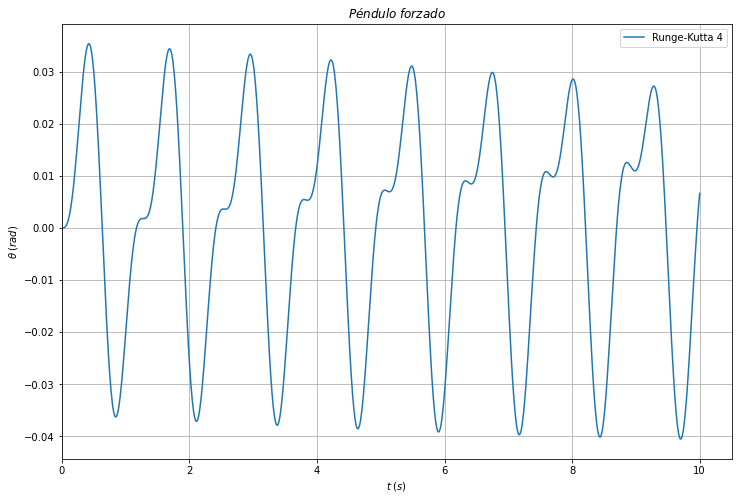

In [1]:
# Laboratorio métodos computacionales: Ejercicio 9
# Estudiante: Francisco Javier Díaz Perdomo

import numpy as np
import matplotlib.pyplot as plt

g, l, C, omega = 9.81, 0.1, 2, 5

def f(y, u, t):
    return -(g/l)*np.sin(y) + C*np.cos(y)*np.sin(omega*t)

Tmin, Tmax, Npoints = 0., 10, 1000
T = np.linspace(Tmin, Tmax, Npoints)
dt = (Tmax-Tmin)/(Npoints)

Theta = []
Omega = []

y = 0.0
u = 0.0

for x in T:
    
    Theta.append(y)
    Omega.append(u)
    
    m1 = dt*u
    k1 = dt*f(y, u, x)  #(x, v, t)
    m2 = dt*(u + 0.5*k1)
    k2 = dt*f(y+0.5*m1, u+0.5*k1, x+0.5*dt)
    m3 = dt*(u + 0.5*k2)
    k3 = dt*f(y+0.5*m2, u+0.5*k2, x+0.5*dt)
    m4 = dt*(u + k3)
    k4 = dt*f(y+m3, u+k3, x+dt)

    y += (m1 + 2*m2 + 2*m3 + m4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6

fig = plt.figure(figsize = (12, 8))
plt.plot(T, Theta, label = 'Runge-Kutta 4')
plt.title('$Péndulo \; forzado$')
plt.xlim(Tmin, Tmax*1.05)
plt.xlabel('$t \; (s)$')
plt.ylabel(r'$ \theta \; (rad)$')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('DiazFrancisco_grafica.png')